<a href="https://colab.research.google.com/github/criscalle/Machine_Learning/blob/main/Predicci%C3%B3n_de_millas_por_gal%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
#Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

mpg = sns.load_dataset('mpg')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [66]:

# Descripción general del dataset

print("Dimensiones del dataset:", mpg.shape)
print("\nPrimeras filas del dataset:")
display(mpg.head())

print("\n🔹 Información de tipos de datos:")
mpg.info()

#Descripción de variables y tipos de datos
desc = pd.DataFrame({
    'Variable': mpg.columns,
    'Tipo de Dato': mpg.dtypes.values,
    'Descripción': [
        'Millas por galón (variable objetivo)',
        'Número de cilindros del motor',
        'Desplazamiento del motor (pulg³)',
        'Potencia del motor (HP)',
        'Peso del vehículo',
        'Tiempo de aceleración (0 a 60 mph)',
        'Año del modelo',
        'Origen del vehículo (1=EE.UU., 2=Europa, 3=Asia)',
        'Nombre del vehículo'
    ]
})
display(desc)

# Resumen estadístico
print("\nResumen estadístico:")
display(mpg.describe(include='all'))

Dimensiones del dataset: (398, 9)

Primeras filas del dataset:


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino



🔹 Información de tipos de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


,Variable,Tipo de Dato,Descripción
0,mpg,float64,Millas por galón (variable objetivo)
1,cylinders,int64,Número de cilindros del motor
2,displacement,float64,Desplazamiento del motor (pulg³)
3,horsepower,float64,Potencia del motor (HP)
4,weight,int64,Peso del vehículo
5,acceleration,float64,Tiempo de aceleración (0 a 60 mph)
6,model_year,int64,Año del modelo
7,origin,object,"Origen del vehículo (1=EE.UU., 2=Europa, 3=Asia)"
8,name,object,Nombre del vehículo



Resumen estadístico:


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398,398
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,305
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,usa,ford pinto
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249,6
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,NaN,NaN
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,NaN,NaN
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,NaN,NaN
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,NaN,NaN
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,NaN,NaN
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,NaN,NaN


In [67]:
# Análisis inicial de calidad de datos

# Valores nulos
print("\nConteo de valores nulos por variable:")
display(mpg.isnull().sum())




Conteo de valores nulos por variable:


,0
mpg,0
cylinders,0
displacement,0
horsepower,6
weight,0
acceleration,0
model_year,0
origin,0
name,0


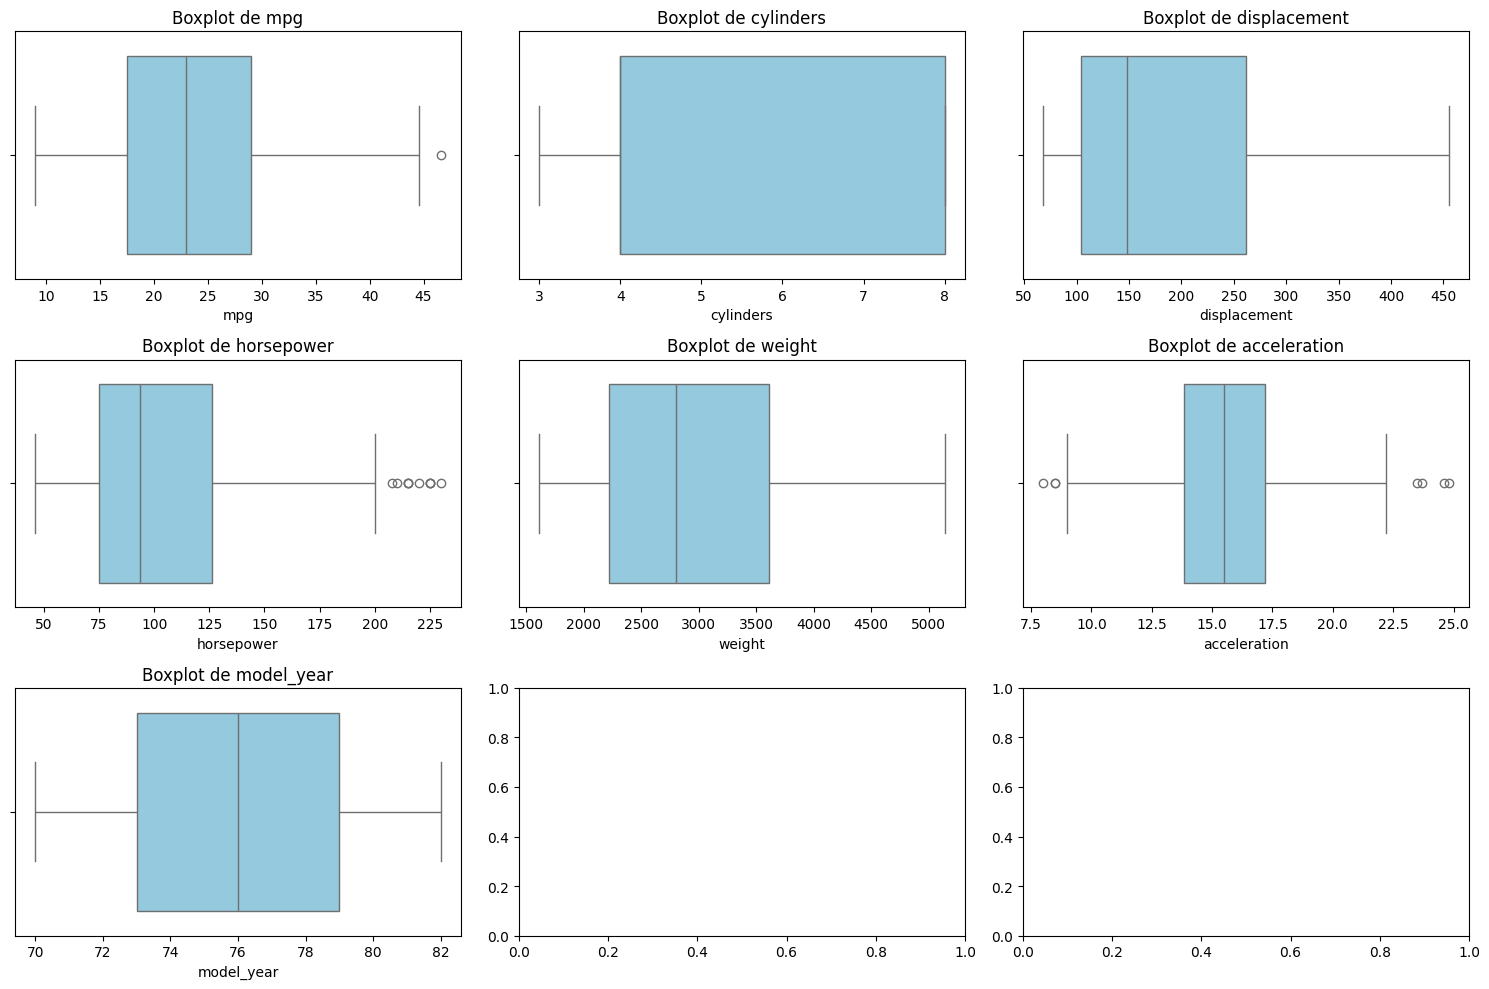

In [68]:
# Detección de valores atípicos en variables numéricas
numeric_cols = mpg.select_dtypes(include=['float64', 'int64']).columns
fig, axes = plt.subplots(len(numeric_cols)//3 + 1, 3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.boxplot(data=mpg, x=col, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Boxplot de {col}')

plt.tight_layout()
plt.show()

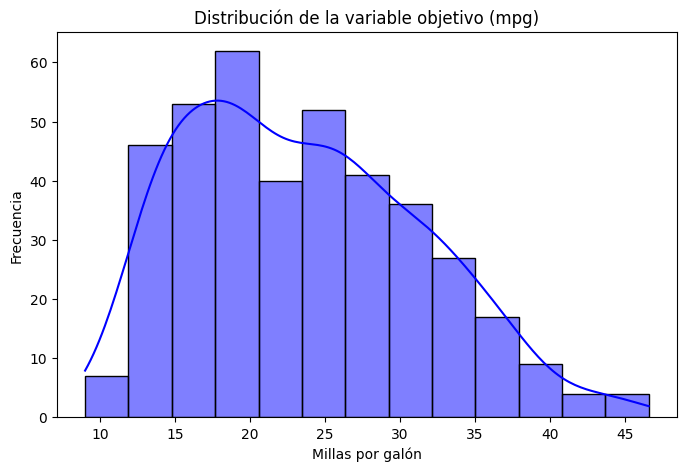

In [69]:
#  Distribución de la variable objetivo

plt.figure(figsize=(8,5))
sns.histplot(mpg['mpg'], kde=True, color='blue')
plt.title("Distribución de la variable objetivo (mpg)")
plt.xlabel("Millas por galón")
plt.ylabel("Frecuencia")
plt.show()

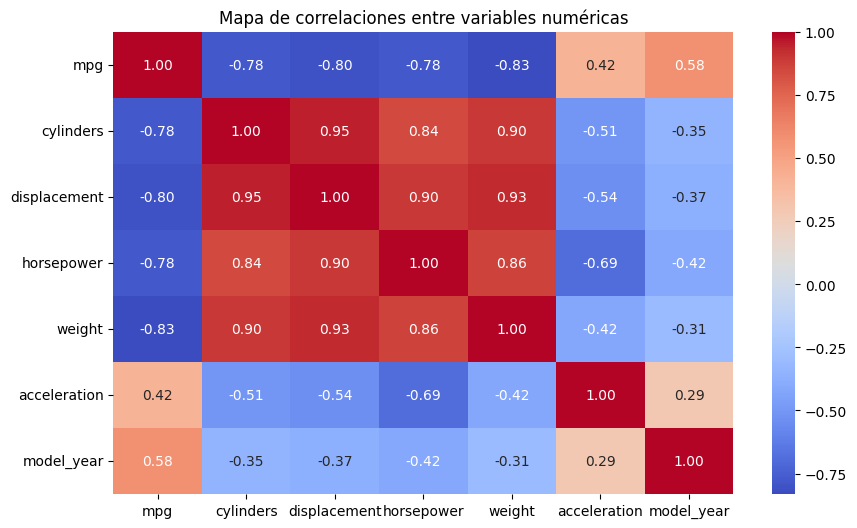

In [70]:
# Relación entre variables predictoras y la variable objetivo

# Correlaciones numéricas
plt.figure(figsize=(10,6))
sns.heatmap(mpg.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de correlaciones entre variables numéricas")
plt.show()

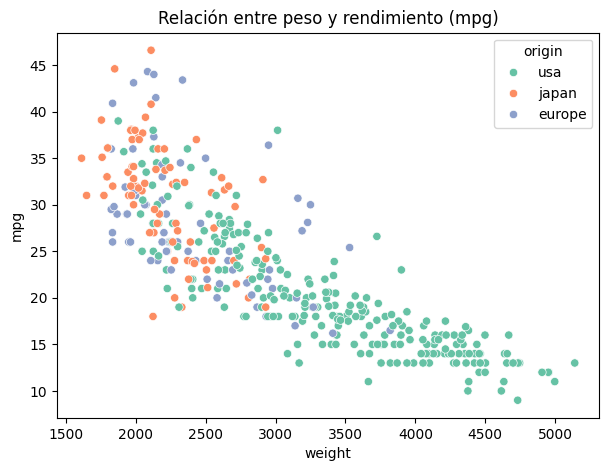

In [71]:
# Relación mpg vs. peso
plt.figure(figsize=(7,5))
sns.scatterplot(data=mpg, x='weight', y='mpg', hue='origin', palette='Set2')
plt.title("Relación entre peso y rendimiento (mpg)")
plt.show()

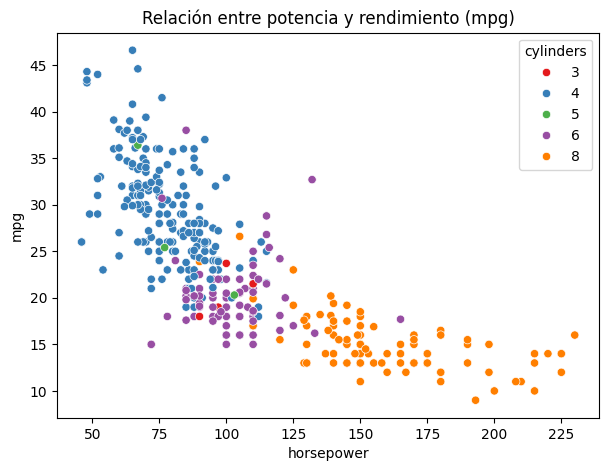

In [72]:
# mpg vs. potencia
plt.figure(figsize=(7,5))
sns.scatterplot(data=mpg, x='horsepower', y='mpg', hue='cylinders', palette='Set1')
plt.title("Relación entre potencia y rendimiento (mpg)")
plt.show()

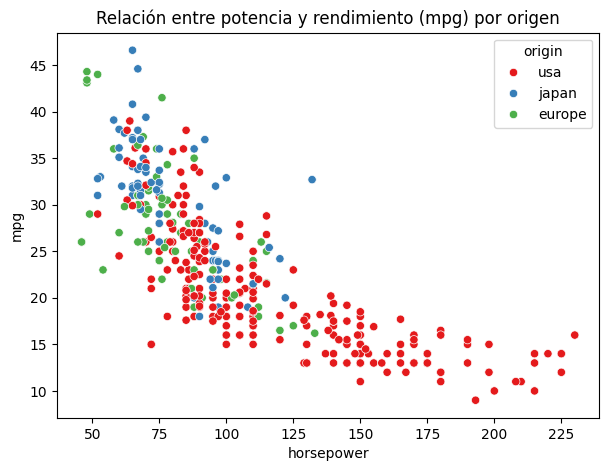

In [73]:
# mpg vs. potencia segun su origen
plt.figure(figsize=(7,5))
sns.scatterplot(data=mpg, x='horsepower', y='mpg', hue='origin', palette='Set1')
plt.title("Relación entre potencia y rendimiento (mpg) por origen")
plt.show()

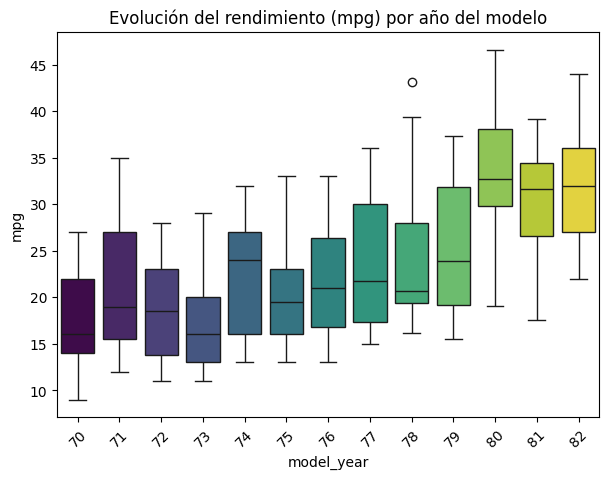

In [74]:
# mpg vs. año del modelo
plt.figure(figsize=(7,5))
sns.boxplot(data=mpg, x='model_year', y='mpg', hue='model_year', palette='viridis', legend=False)
plt.title("Evolución del rendimiento (mpg) por año del modelo")
plt.xticks(rotation=45)
plt.show()

In [75]:
# PREPROCESAMIENTO DE DATOS

# Copia de seguridad
df = mpg.copy()

# Imputación de valores nulos (como se vio mas arriba, solo horsepower tiene valores nulos 6)
# Copia de seguridad
df = mpg.copy()

# Imputación de valores nulos

print("Valores nulos antes del tratamiento:")
display(df.isnull().sum())

# Solo 'horsepower' tiene valores nulos → imputamos con la media
mean_hp = df['horsepower'].mean()
df['horsepower'] = df['horsepower'].fillna(mean_hp)

print(f"\nSe imputaron {mpg['horsepower'].isnull().sum()} valores nulos en 'horsepower' con la media = {mean_hp:.2f}")

print("\nVerificación posterior:")
display(df.isnull().sum())

Valores nulos antes del tratamiento:


,0
mpg,0
cylinders,0
displacement,0
horsepower,6
weight,0
acceleration,0
model_year,0
origin,0
name,0



Se imputaron 6 valores nulos en 'horsepower' con la media = 104.47

Verificación posterior:


,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model_year,0
origin,0
name,0


Justificación del Preprocesamiento
1. Imputación de Valores Nulos

Durante el análisis inicial, se identificó que la variable horsepower presentaban valores nulos. La variable horsepower es numérica y relevante para el modelo, ya que influye directamente en el consumo de combustible (mpg).
Por tanto:

Se imputaron los valores nulos de horsepower utilizando la mediana de la variable.
🔹 Justificación: La mediana es robusta frente a valores atípicos y mantiene la tendencia central sin distorsionar la distribución original de los datos.


In [76]:
# Limpieza de datos categóricos


# Revisamos columnas categóricas
cat_cols = df.select_dtypes(include=['object']).columns
print("\nVariables categóricas:", list(cat_cols))

# Revisamos posibles inconsistencias
for col in cat_cols:
    print(f"\nValores únicos en '{col}':")
    print(df[col].unique())

# 'name' tiene muchos valores únicos → no aporta a la predicción
df = df.drop(columns=['name'])




Variables categóricas: ['origin', 'name']

Valores únicos en 'origin':
['usa' 'japan' 'europe']

Valores únicos en 'name':
['chevrolet chevelle malibu' 'buick skylark 320' 'plymouth satellite'
 'amc rebel sst' 'ford torino' 'ford galaxie 500' 'chevrolet impala'
 'plymouth fury iii' 'pontiac catalina' 'amc ambassador dpl'
 'dodge challenger se' "plymouth 'cuda 340" 'chevrolet monte carlo'
 'buick estate wagon (sw)' 'toyota corona mark ii' 'plymouth duster'
 'amc hornet' 'ford maverick' 'datsun pl510'
 'volkswagen 1131 deluxe sedan' 'peugeot 504' 'audi 100 ls' 'saab 99e'
 'bmw 2002' 'amc gremlin' 'ford f250' 'chevy c20' 'dodge d200' 'hi 1200d'
 'chevrolet vega 2300' 'toyota corona' 'ford pinto'
 'plymouth satellite custom' 'ford torino 500' 'amc matador'
 'pontiac catalina brougham' 'dodge monaco (sw)'
 'ford country squire (sw)' 'pontiac safari (sw)'
 'amc hornet sportabout (sw)' 'chevrolet vega (sw)' 'pontiac firebird'
 'ford mustang' 'mercury capri 2000' 'opel 1900' 'peugeot 304' 'fi

In [77]:
 #Transformación de variables categóricas

# 'origin' es categórica: convertimos a variables dummy para poder hacer modelos de machine learning y regresion
df = pd.get_dummies(df, columns=['origin'], drop_first=True)


#  Verificación final del dataset limpio

print("\nDataset final después del preprocesamiento:")
display(df.head())

print("\nTipos de datos actualizados:")
df.info()

print("\nResumen estadístico final:")
display(df.describe())


Dataset final después del preprocesamiento:


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,70,False,True
1,15.0,8,350.0,165.0,3693,11.5,70,False,True
2,18.0,8,318.0,150.0,3436,11.0,70,False,True
3,16.0,8,304.0,150.0,3433,12.0,70,False,True
4,17.0,8,302.0,140.0,3449,10.5,70,False,True



Tipos de datos actualizados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin_japan  398 non-null    bool   
 8   origin_usa    398 non-null    bool   
dtypes: bool(2), float64(4), int64(3)
memory usage: 22.7 KB

Resumen estadístico final:


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.199187,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [78]:
# ================================
# División en Entrenamiento y Prueba
# ================================

from sklearn.model_selection import train_test_split

# Variable objetivo
y = df['mpg']

# Variables predictoras
X = df.drop(columns=['mpg'])  # name se excluye por no ser predictiva

# División 80% entrenamiento – 20% prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Mostrar tamaños de los subconjuntos
print("Tamaño X_train:", X_train.shape)
print("Tamaño X_test:", X_test.shape)
print("Tamaño y_train:", y_train.shape)
print("Tamaño y_test:", y_test.shape)


Tamaño X_train: (318, 8)
Tamaño X_test: (80, 8)
Tamaño y_train: (318,)
Tamaño y_test: (80,)


In [79]:
# ============================================
# ENTRENAMIENTO Y COMPARACIÓN DE MODELOS
# ============================================

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# --------------------------------------------
# 1) Modelo 1: Regresión Lineal
# --------------------------------------------

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

# Predicciones
y_pred_lin = lin_model.predict(X_test)

# Métricas
lin_r2 = r2_score(y_test, y_pred_lin)
lin_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lin))
lin_mae = mean_absolute_error(y_test, y_pred_lin)

# --------------------------------------------
# 2) Modelo 2: Árbol de Decisión (Regressor)
# --------------------------------------------

tree_model = DecisionTreeRegressor(random_state=42, max_depth=4)
tree_model.fit(X_train, y_train)

# Predicciones
y_pred_tree = tree_model.predict(X_test)

# Métricas
tree_r2 = r2_score(y_test, y_pred_tree)
tree_rmse = np.sqrt(mean_squared_error(y_test, y_pred_tree))
tree_mae = mean_absolute_error(y_test, y_pred_tree)

# --------------------------------------------
# COMPARACIÓN DE RESULTADOS
# --------------------------------------------

print("===============================================")
print("   COMPARACIÓN DE MODELOS SUPERVISADOS")
print("===============================================\n")

print(">> Regresión Lineal:")
print("R²:", round(lin_r2, 4))
print("RMSE:", round(lin_rmse, 4))
print("MAE:", round(lin_mae, 4), "\n")

print(">> Árbol de Decisión:")
print("R²:", round(tree_r2, 4))
print("RMSE:", round(tree_rmse, 4))
print("MAE:", round(tree_mae, 4))


   COMPARACIÓN DE MODELOS SUPERVISADOS

>> Regresión Lineal:
R²: 0.8449
RMSE: 2.8878
MAE: 2.2876 

>> Árbol de Decisión:
R²: 0.7885
RMSE: 3.3721
MAE: 2.3302


1) Desempeño general (R²)
El R² indica qué proporción de la variabilidad del mpg es explicada por el modelo.
La Regresión Lineal obtiene R² = 0.8449, lo que significa que explica aproximadamente 84,49 % de la variabilidad del rendimiento de combustible.


El Árbol de Decisión alcanza R² = 0.7885, logrando explicar cerca del 78,85 % de dicha variabilidad.


La regresión lineal muestra un desempeño superior, lo que sugiere que la relación entre las variables predictoras y mpg es principalmente lineal, y no presenta una fuerte estructura no lineal que el árbol pudiera aprovechar.


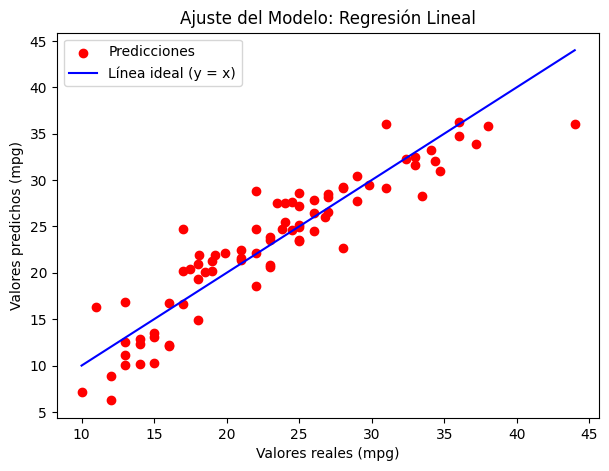

In [84]:
plt.figure(figsize=(7,5))

# Puntos predichos
plt.scatter(y_test, y_pred, color="red", label="Predicciones")

# Línea ideal
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="blue", label="Línea ideal (y = x)")

plt.title("Ajuste del Modelo: Regresión Lineal")
plt.xlabel("Valores reales (mpg)")
plt.ylabel("Valores predichos (mpg)")
plt.legend()
plt.show()

